# Import libraries

In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import ast
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Reading the results

We read the results from text files into Pandas DataFrames for analysis.

In [2]:



path = "./parameter_tuning/"
files = [f for f in listdir(path) if isfile(join(path, f))]

dd = defaultdict(list)

for file in files:
    f_path = join(path,file)
    with open(f_path) as f:
        lines = f.readlines()
        str_dict = lines[0]
        dset = lines[2]
        # convert dictionary string to dictionary
        t_dict = ast.literal_eval(str_dict)
        
        keys = t_dict['params'].keys()
        if 'gamma' in keys:
            t_dict['params'].update({"algorithm": "GaGRAD"})
        elif 'coef_p' in keys:
            t_dict['params'].update({"algorithm": "PsoGRAD"})
        elif 'step_size' in keys:
            t_dict['params'].update({"algorithm": "PlsGRAD"})
        else:
            t_dict['params'].update({"algorithm": "PrsGRAD"})
            
        if 'breast_cancer' in dset:
            t_dict['params'].update({"data_src": "BCR", "objects": 116, "attributes": 10})
        elif 'hungary_chickenpox' in dset:
            t_dict['params'].update({"data_src": "CPX", "objects": 521, "attributes": 20})
        elif 'c2k' in dset:
            t_dict['params'].update({"data_src": "C2K", "objects": 3942, "attributes": 98})
        elif 'Omnidir_site2k' in dset:
            t_dict['params'].update({"data_src": "OMD", "objects": 2000, "attributes": 11})
        elif 'hcv_data' in dset:
            t_dict['params'].update({"data_src": "HCV", "objects": 615, "attributes": 14})
        elif 'aps_2k' in dset:
            t_dict['params'].update({"data_src": "APS", "objects": 2474, "attributes": 171})
        elif 'power_consumption10k' in dset:
            t_dict['params'].update({"data_src": "HPC", "objects": 10001, "attributes": 9})
        elif 'air_quality' in dset:
            t_dict['params'].update({"data_src": "AQY", "objects": 9358, "attributes": 15})
        elif 'directio8k' in dset:
            t_dict['params'].update({"data_src": "DIR", "objects": 8075, "attributes": 21})
        elif 'x_data' in dset:
            t_dict['params'].update({"data_src": "XDA", "objects": 15398, "attributes": 30})
        

        for key, value in t_dict.items():
            dd[key].append(value)
        # print(type(t_dict))
        # print(t_dict)
        # print(dset)
#dd

# 2. Parameter Tuning
We perform 2 experiments that helps us choose the best parameters for all the algorithms.

## 2.1 Determining maximum iteration value (T)
First we determine the value of T for the algorithms

<AxesSubplot:xlabel='data_src', ylabel='max_iteration'>

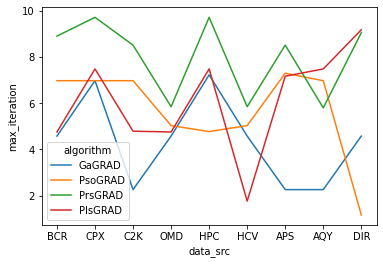

In [3]:
# Create data-frames

#dd['params'][0]['algorithm']
df = pd.DataFrame.from_dict(dd['params'])
df_ga = df.loc[df['algorithm'] == 'GaGRAD'][['algorithm', 'data_src', 'objects', 'attributes', 'max_iteration', 'n_pop', 'pc', 'gamma', 'mu', 'sigma']]
df_pso = df.loc[df['algorithm'] == 'PsoGRAD'][['algorithm', 'data_src', 'objects', 'attributes', 'max_iteration', 'n_particles', 'velocity', 'coef_p', 'coef_g']]
df_pls = df.loc[df['algorithm'] == 'PlsGRAD'][['algorithm', 'data_src', 'objects', 'attributes', 'max_iteration', 'step_size']]
df_prs = df.loc[df['algorithm'] == 'PrsGRAD'][['algorithm', 'data_src', 'objects', 'attributes', 'max_iteration']]

sns.lineplot(data=df, x='data_src', y="max_iteration", hue="algorithm")


## 2.2 Determining the optimum parameter values
For each algorithm we determine the optimum parameter values that will guarantee maximum efficiency.

### 2.2.1. GA-GRAD Algorithm

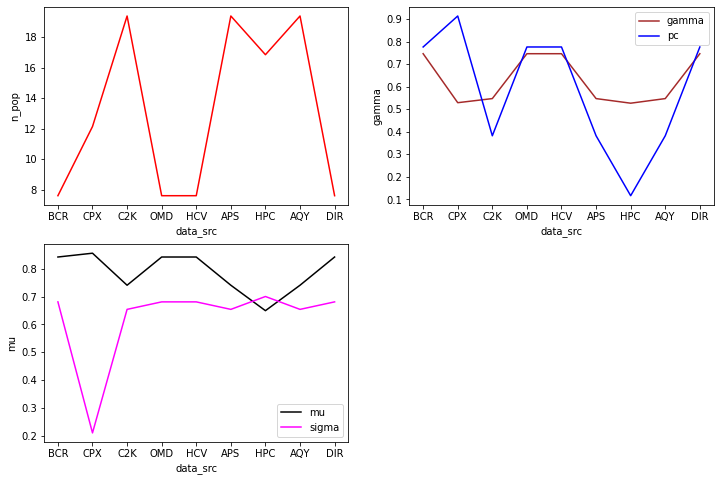

,algorithm,data_src,objects,attributes,max_iteration,n_pop,pc,gamma,mu,sigma
0,GaGRAD,BCR,116,10,4.579092,7.607551,0.775731,0.745913,0.842007,0.680798
1,GaGRAD,CPX,521,20,6.974152,12.144546,0.913062,0.528717,0.855676,0.209980
3,GaGRAD,C2K,3942,98,2.263482,19.396970,0.382082,0.546952,0.740596,0.653858
7,GaGRAD,OMD,2000,11,4.579092,7.607551,0.775731,0.745913,0.842007,0.680798
11,GaGRAD,HCV,615,14,4.579092,7.607551,0.775731,0.745913,0.842007,0.680798
14,GaGRAD,APS,2474,171,2.263482,19.396970,0.382082,0.546952,0.740596,0.653858
17,GaGRAD,HPC,10001,9,7.226894,16.857888,0.116459,0.526532,0.649201,0.700115
23,GaGRAD,AQY,9358,15,2.263482,19.396970,0.382082,0.546952,0.740596,0.653858
34,GaGRAD,DIR,8075,21,4.579092,7.607551,0.775731,0.745913,0.842007,0.680798


In [4]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.lineplot(data=df_ga, x='data_src', y="n_pop", color='red')

#plt.subplot(2, 2, 2)
#sns.lineplot(data=df_ga, x='data_src', y="pc", color='blue')

plt.subplot(2, 2, 2)
sns.lineplot(data=df_ga, x='data_src', y="gamma", color='brown', label='gamma')
sns.lineplot(data=df_ga, x='data_src', y="pc", color='blue', label='pc')


plt.subplot(2, 2, 3)
sns.lineplot(data=df_ga, x='data_src', y="mu", color='black', label='mu')
sns.lineplot(data=df_ga, x='data_src', y="sigma", color='magenta', label='sigma')

#plt.subplot(2, 3, 5)
#sns.lineplot(data=df_ga, x='data_src', y="sigma", color='magenta')

plt.show()
# multiple lines with legend
#plt.plot(df_ga['data_src'],df_ga['max_iteration'], marker='.', color='r', label= 'max-iteration')
#plt.plot(df_ga['data_src'],df_ga['n_pop'], marker='+', color = 'g', label= 'n-pop')
#plt.legend();

df_ga

### 2.2.2. PSO-GRAD Algorithm

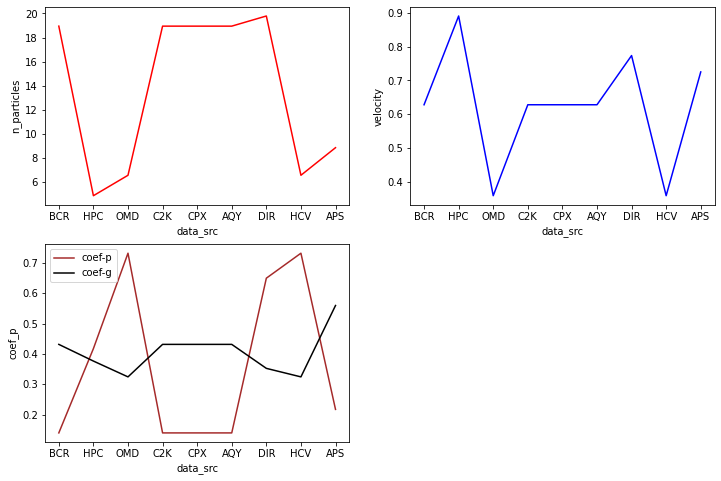

,algorithm,data_src,objects,attributes,max_iteration,n_particles,velocity,coef_p,coef_g
2,PsoGRAD,BCR,116,10,6.974152,18.947300,0.627900,0.139963,0.431343
5,PsoGRAD,HPC,10001,9,4.772751,4.884593,0.890306,0.417414,0.376449
13,PsoGRAD,OMD,2000,11,5.031042,6.578669,0.358998,0.731423,0.324355
15,PsoGRAD,C2K,3942,98,6.974152,18.947300,0.627900,0.139963,0.431343
18,PsoGRAD,CPX,521,20,6.974152,18.947300,0.627900,0.139963,0.431343
25,PsoGRAD,AQY,9358,15,6.974152,18.947300,0.627900,0.139963,0.431343
27,PsoGRAD,DIR,8075,21,1.164594,19.788361,0.773349,0.649201,0.352413
31,PsoGRAD,HCV,615,14,5.031042,6.578669,0.358998,0.731423,0.324355
32,PsoGRAD,APS,2474,171,7.297825,8.867064,0.724960,0.217383,0.559294


In [5]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.lineplot(data=df_pso, x='data_src', y="n_particles", color='red')

plt.subplot(2, 2, 2)
sns.lineplot(data=df_pso, x='data_src', y="velocity", color='blue')

plt.subplot(2, 2, 3)
sns.lineplot(data=df_pso, x='data_src', y="coef_p", color='brown', label='coef-p')
sns.lineplot(data=df_pso, x='data_src', y="coef_g", color='black', label='coef-g')

#plt.subplot(2, 2, 4)
#sns.lineplot(data=df_pso, x='data_src', y="coef_g", color='black')


plt.show()

df_pso

### 2.2.3. PLS-GRAD Algorithm

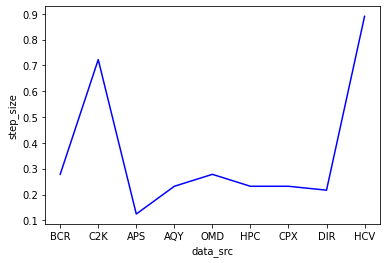

,algorithm,data_src,objects,attributes,max_iteration,step_size
8,PlsGRAD,BCR,116,10,4.755743,0.278291
9,PlsGRAD,C2K,3942,98,4.789969,0.722689
16,PlsGRAD,APS,2474,171,7.166976,0.124649
20,PlsGRAD,AQY,9358,15,7.482920,0.232080
22,PlsGRAD,OMD,2000,11,4.755743,0.278291
24,PlsGRAD,HPC,10001,9,7.482920,0.232080
28,PlsGRAD,CPX,521,20,7.482920,0.232080
30,PlsGRAD,DIR,8075,21,9.177360,0.217026
33,PlsGRAD,HCV,615,14,1.765398,0.890328


In [6]:
fig = plt.figure(figsize=(6,4))
sns.lineplot(data=df_pls, x='data_src', y="step_size", color='blue')
plt.show()

df_pls

### 2.2.4. PRS-GRAD Algorithm

In [7]:
df_prs

,algorithm,data_src,objects,attributes,max_iteration
4,PrsGRAD,OMD,2000,11,5.849351
6,PrsGRAD,HCV,615,14,5.849351
10,PrsGRAD,HPC,10001,9,9.714354
12,PrsGRAD,C2K,3942,98,8.511631
19,PrsGRAD,BCR,116,10,8.903283
21,PrsGRAD,APS,2474,171,8.511631
26,PrsGRAD,CPX,521,20,9.714354
29,PrsGRAD,AQY,9358,15,5.798488
35,PrsGRAD,DIR,8075,21,9.051460
